**Project Title**: Mall Customer Segmentation using K-Means Clustering

**Objective:**

To analyze mall customer data and segment them into distinct groups based on their age, annual income, and spending behavior. This helps businesses target the right customers with personalized marketing.

**Dataset Info:**

-->200 records

**Columns:** CustomerID, Gender, Age, Annual Income, Spending Score

**Techniques:**

1.Exploratory Data Analysis (EDA)

2.Data Preprocessing (Scaling)

3.K-Means Clustering

4.Visualization (Seaborn, Matplotlib)

**Key Insights:**

--> Identified 5 unique customer segments

--> Found high-income, high-spending customers (ideal for luxury products)

--> Found low-income, low-spending customers (targeted with discounts)

--> One group had high income but low spending (potential for upselling) 

**Business Use:** Companies can use these segments to:

1)Personalize promotions

2)Increase customer retention

3)Improve campaign targeting

**Conclusion:**

K-Means clustering helped uncover hidden customer segments using only basic features. This simple segmentation approach can help businesses optimize marketing and improve sales conversion.

**1.Load and Explore Dataset:**


In [1]:
import pandas as pd

file_path = '/kaggle/input/mall-customers/Mall_Customers.csv'

df = pd.read_csv(file_path)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**2.Data Cleaning and Preprocessing:**


In [2]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']
df.drop('CustomerID', axis=1, inplace=True)

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          200 non-null    int64
 1   Age             200 non-null    int64
 2   Annual_Income   200 non-null    int64
 3   Spending_Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


,Gender,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


**3.Exploratory Data Analysis (EDA):**


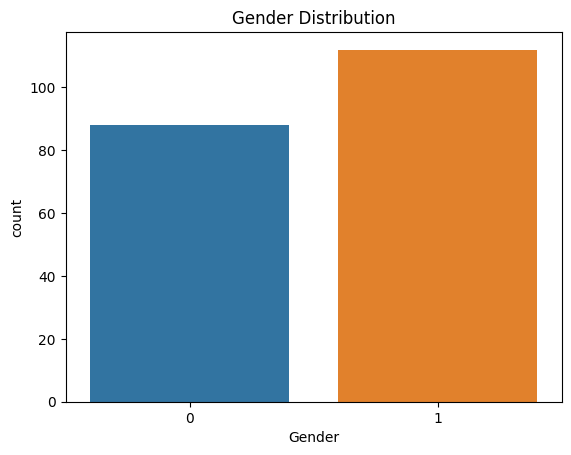

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


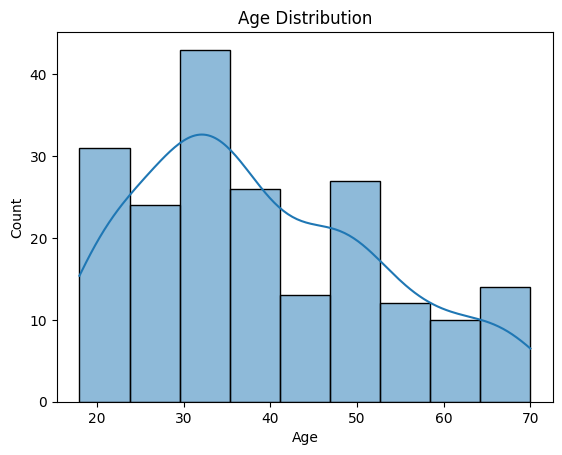

In [4]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

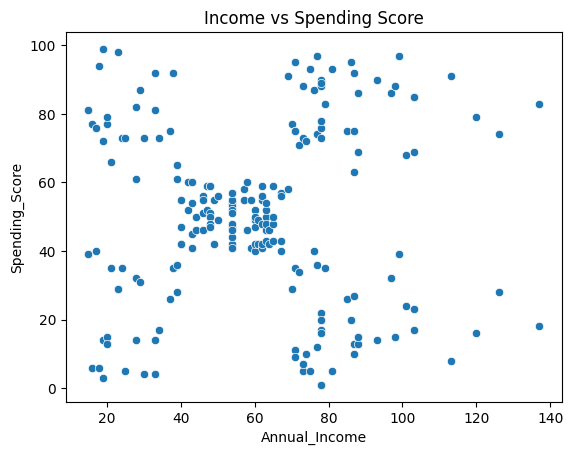

In [5]:
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score')
plt.title("Income vs Spending Score")
plt.show()

**4.Feature Scaling:**

In [6]:
from sklearn.preprocessing import StandardScaler

X = df[['Age', 'Annual_Income', 'Spending_Score']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**5.Finding Optimal Clusters (Elbow Method):**

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

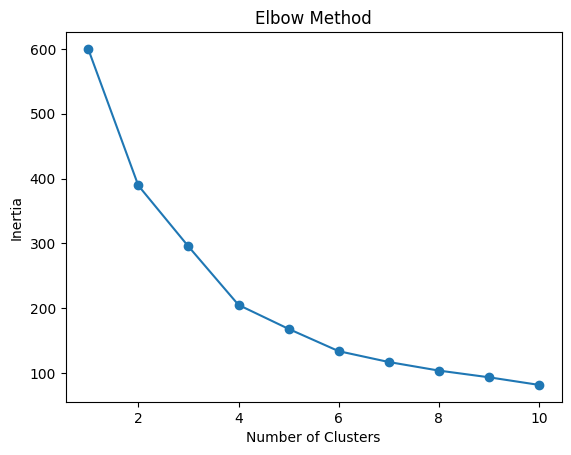

In [7]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


**6.Applying K-Means Clustering:**

In [8]:
kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual_Income,Spending_Score,Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,3
3,1,23,16,77,2
4,1,31,17,40,2


**7.Visualize Customer Segments:**

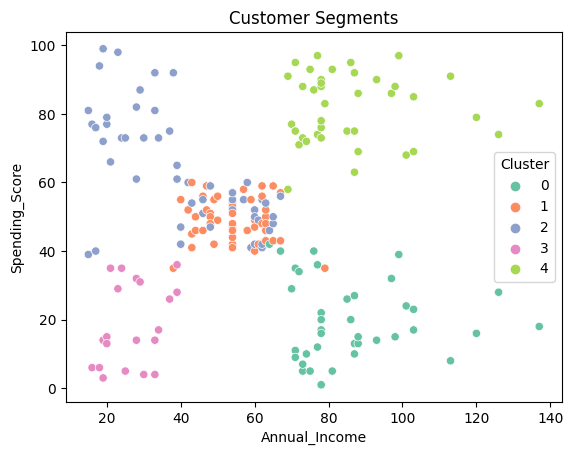

In [9]:
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='Set2')
plt.title("Customer Segments")
plt.show()


**8.Analyze Cluster Profiles:**

In [10]:
df.groupby('Cluster').mean(numeric_only=True)


,Gender,Age,Annual_Income,Spending_Score
Cluster,,,,
0,0.487179,39.871795,86.102564,19.358974
1,0.574468,55.638298,54.382979,48.851064
2,0.592593,25.185185,41.092593,62.240741
3,0.600000,46.250000,26.750000,18.350000
4,0.550000,32.875000,86.100000,81.525000


**Segment Summary:**

**1)Cluster 0 - Careful Big Earners**: High income but low spending. Consider premium loyalty programs or targeted ads.

**2)Cluster 1 - Mature Average Shoppers**: Older adults with stable spending. Retain via loyalty schemes.

**3)Cluster 2 - Young Impulse Buyers**: Low income, high spending youth. Target with trend-based and budget campaigns.

**4)Cluster 3 - Low Value Segment**: Low income and low spending. Minimal marketing focus.

**5)Cluster 4 - Premium Customers**: High income and high spending. VIP treatment, personalized experiences recommended.


**Business Insights:**

--> Segment-based marketing is more effective than general strategies.

--> Target Clusters 2 and 4 for immediate sales growth.

--> Focus on converting Cluster 0 with personalized offers.

--> Use Cluster 1 for steady revenue and retention programs.

--> Minimize marketing cost on Cluster 3.


**Conclusion:**

Customer segmentation using K-Means revealed five distinct groups, allowing for personalized marketing and smarter resource allocation. This can significantly improve both customer satisfaction and business revenue.
